In [23]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [24]:
class Neural_Network(object):
    
    def __init__(self,inum=1, hidden=[3,3],onum=1):
        
        self.inum = inum
        self.hidden=hidden
        self.onum=onum
        
        layer = [inum] + hidden + [onum]
        # creating weight array
        weight = []
        for i in range(len(layer)-1):
            w= np.random.rand(layer[i],layer[i+1])
            weight.append(w)
        self.weight=weight
        
        # derivate of layers
        deri=[]
        for i in range(len(layer)-1):
            e= np.zeros((layer[i],layer[i+1]))
            deri.append(e)
        self.deri=deri
        
        # activation function
        acti=[]
        for i in range(len(layer)):
            f=np.zeros(layer[i])
            acti.append(f)
        self.acti=acti
        
    
    def forword_propagation(self,inputs):
        
        acti=inputs
        self.acti[0]=acti # for back propogation
        for i, w in enumerate(self.weight):
            net_inputs = np.dot(acti,w)
            acti=self._sigmoid(net_inputs)
            self.acti[i+1]=acti
        
        return acti
    
    def back_propogation(self,mse):
        
        for i in reversed(range(len(self.deri))):
            acti=self.acti[i+1]
            D=mse*self._sigmoid_deri(acti)
            re_D=D.reshape(D.shape[0],-1).T
            re_acti=self.acti[i]
            re_acti=re_acti.reshape(re_acti.shape[0],-1)
            self.deri[i]=np.dot(re_acti,re_D)
            mse=np.dot(D,self.weight[i].T)
            
    
    def train_network(self,inputs,target,epoch,rate):
        
        for i in range(epoch):
            errors=0
            for j, input in enumerate(inputs):
                tar=target[j]
                out=self.forword_propagation(input)
                error=tar-out
                self.back_propogation(error)
                self.gradient_decent(rate)
                errors = errors + self._mse(tar,out)
        print(errors)
    
    def gradient_decent(self,rate):
        
        for i in range(len(self.weight)):
            weight=self.weight[i]
            deri=self.deri[i]
            weight= weight+deri*rate
    
    def _sigmoid(self,x):
        y=1.0/(1+np.exp(-x))
        return y
    
    def _sigmoid_deri(self,x):
        return x*(1.0-x)
    
    def _mse(self,tar,out):
        mse=np.average((tar-out)**2)
        return mse        

In [25]:
k=12
m=31
w=np.sqrt(k/m)
t=np.linspace(0,np.pi/w,100)
d=5*np.sin(w*t)
t=np.array(t).reshape(100,1)
d=np.array(d).reshape(100,1)

layer=[6,6,6]
neural=Neural_Network(1,layer,1)

mse=neural.train_network(t,d,100,0.05)

717.3989516915111


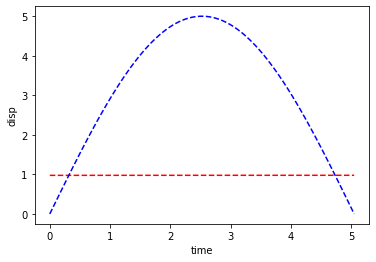

In [28]:
output=neural.forword_propagation(t)
plt.plot(t,output,'r--')
plt.plot(t,d,'b--')
plt.xlabel("time")
plt.ylabel("disp")
plt.show()